## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [2]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [3]:
df = pd.read_csv('urology_all_psm_open.csv')

In [4]:
df.shape

(4327, 37)

In [5]:
df.head()

personid                           encounterid  \
0  09c15d4d-1969-4ab9-b881-c3592f5be0d4  8c1da545-d0d2-4505-b0ca-991578787667   
1  0eda6396-f147-4130-a6ec-b8869a8e3680  f84875d2-98a0-4710-9e55-ce614d91cc1d   
2  125e89d0-799d-49aa-9ab5-c16d19768b3f  ebb4892d-918f-475a-a41c-4d959bc3dc96   
3  18f54011-d974-4768-b720-81f2c8326297  8ad5e2e0-c154-4340-af7a-56801ab38c68   
4  20ea9e4b-cfb5-4b00-aa36-8434eb7ea4db  04adce91-7c50-4791-8223-020ccfd688a7   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              0             0        0    0   6.476389   
1            0              0             0        0    0  15.384722   
2            0              0             0        0    0  23.975694   
3            0              0             0        0    0  17.104861   
4            0              1             1        1    0  14.681250   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex   race  \
0                 0                 1.0                  67  66.0   F  White   
1                 0                 0.0                  75  48.0   F  Black   
2                 0                 0.0                  62  69.0   F  White   
3                 0                 0.0                  73  58.0   M  White   
4                 0                 1.0                  64  28.0   F    NaN   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  0                   0        0            3.2   
1    0                  0                   0        0            NaN   
2   10                  0                   0        0            NaN   
3    1                  0                   0        1            NaN   
4    6                  0                   0        0            2.2   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                          Low             NaN        1.1   
1                          NaN             NaN        NaN   
2                          NaN             NaN        NaN   
3                          NaN             NaN        NaN   
4                          Low             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Normal       0.68                   Normal            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown       1.09                   Normal            0   
4                  Unknown       0.50                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           0.0            0     0                0          0   96.047648   
1           NaN            1     5                1          0         NaN   
2           0.0            0     3                1          0   88.402600   
3           1.0            0     1                1          0   74.422813   
4           1.0            0     1                0          0  131.710977   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0                Normal    0      14.9                  >= 9.0        1  
1                   NaN    0       NaN                 Unknown        1  
2  Early Kidney Disease    0       NaN                 Unknown        1  
3  Early Kidney Disease    0      10.7                  >= 9.0        1  
4                Normal    0      14.3                  >= 9.0        1

In [6]:
df = df[df['non_elective'] == 0]

In [7]:
df.shape

(1168, 37)

In [8]:
df.head()

personid  \
0   09c15d4d-1969-4ab9-b881-c3592f5be0d4   
2   125e89d0-799d-49aa-9ab5-c16d19768b3f   
5   2bff7bca-ee2c-41bc-ba83-f60b9dc376fe   
6   337fba74-4325-48a0-b63d-0069c70b2c60   
12  5c721efd-1862-4bdc-8355-020f1c6c94c0   

                             encounterid  pre_albumin  early_albumin  \
0   8c1da545-d0d2-4505-b0ca-991578787667            0              0   
2   ebb4892d-918f-475a-a41c-4d959bc3dc96            0              0   
5   27bcb1bd-aa2f-40cd-abab-a13a912fb792            0              0   
6   2af5084c-84f9-4e64-a9da-452a2d897ea6            1              0   
12  1fd95b62-064d-4347-8524-4f7ad7defff0            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
0              0        0    0   6.476389                 0   
2              0        0    0  23.975694                 0   
5              0        0    0  16.120139                 0   
6              1        1    1  15.427778                 0   
12             0        0    0   8.261111                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
0                  1.0                  67  66.0   F  White    0   
2                  0.0                  62  69.0   F  White   10   
5                  1.0                  47  75.0   M  White    3   
6                  1.0                   3  66.0   M  Other    6   
12                 1.0                  71  69.0   F  Black    8   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0                   0                   0        0            3.2   
2                   0                   0        0            NaN   
5                   0                   0        0            2.7   
6                   1                   0        1            NaN   
12                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
0                           Low             NaN       1.10   
2                           NaN             NaN        NaN   
5                           Low             NaN        NaN   
6                           NaN             NaN       1.27   
12                          NaN             2.4        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                    Normal       0.68                   Normal            0   
2                   Unknown        NaN                  Unknown            0   
5                   Unknown       1.00                   Normal            0   
6                    Normal        NaN                  Unknown            0   
12                  Unknown        NaN                  Unknown            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0            0.0            0     0                0          0   96.047648   
2            0.0            0     3                1          0   88.402600   
5            0.0            0     4                0          0   73.297969   
6            0.0            0     3                1          0   33.775629   
12           0.0            1     1                1          0  107.788882   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0                 Normal    0      14.9                  >= 9.0        1  
2   Early Kidney Disease    0       NaN                 Unknown        1  
5   Early Kidney Disease    0      12.9                  >= 9.0        1  
6         Kidney Disease    0       NaN                 Unknown        1  
12                Normal    0       8.9               8.0 - 8.9        1

In [9]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 4324
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      1168 non-null   object 
 1   encounterid                   1168 non-null   object 
 2   pre_albumin                   1168 non-null   int64  
 3   early_albumin                 1168 non-null   int64  
 4   late_albumin                  1168 non-null   int64  
 5   albumin                       1168 non-null   int64  
 6   ICU                           1168 non-null   int64  
 7   LOS_days                      1168 non-null   float64
 8   90_day_mortality              1168 non-null   int64  
 9   90_day_readmission            1110 non-null   float64
 10  hospital_free_days            1168 non-null   int64  
 11  age                           1168 non-null   float64
 12  sex                           1167 non-null   object 
 13  rac

In [11]:
df.isnull().sum()

personid                          0
encounterid                       0
pre_albumin                       0
early_albumin                     0
late_albumin                      0
albumin                           0
ICU                               0
LOS_days                          0
90_day_mortality                  0
90_day_readmission               58
hospital_free_days                0
age                               0
sex                               1
race                             46
CCI                               0
preop_hypotension                 0
postop_hypotension                0
MAKE_90                           0
preop_albumin                   960
preop_albumin_classification    960
postop_albumin                  707
preop_inr                       993
preop_inr_classification          0
preop_scr                       825
preop_scr_classification          0
transfusion                       0
non_elective                      0
vasopressor                 

In [12]:
df.early_albumin.value_counts()

0    1048
1     120
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [13]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    120.000000
mean      11.199446
std        7.779335
min        2.975000
25%        6.298958
50%        8.413889
75%       14.219271
max       57.034792
Name: LOS_days, dtype: float64

In [14]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    1048.000000
mean       13.575156
std        13.809895
min         1.049306
25%         5.772899
50%         9.065278
75%        16.075579
max       165.639583
Name: LOS_days, dtype: float64

In [15]:
df[df['albumin'] == 1].CCI.describe()

count    483.000000
mean       3.672878
std        2.741382
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       12.000000
Name: CCI, dtype: float64

In [16]:
df[df['albumin'] == 0].CCI.describe()

count    685.000000
mean       2.950365
std        2.631987
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: CCI, dtype: float64

In [17]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    112
1      8
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 6.666666666666667


In [18]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    998
1     50
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.770992366412214


In [19]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    65
1.0    47
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 41.964285714285715


In [20]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    624
1.0    374
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 37.4749498997996


In [21]:
df.head()

personid  \
0   09c15d4d-1969-4ab9-b881-c3592f5be0d4   
2   125e89d0-799d-49aa-9ab5-c16d19768b3f   
5   2bff7bca-ee2c-41bc-ba83-f60b9dc376fe   
6   337fba74-4325-48a0-b63d-0069c70b2c60   
12  5c721efd-1862-4bdc-8355-020f1c6c94c0   

                             encounterid  pre_albumin  early_albumin  \
0   8c1da545-d0d2-4505-b0ca-991578787667            0              0   
2   ebb4892d-918f-475a-a41c-4d959bc3dc96            0              0   
5   27bcb1bd-aa2f-40cd-abab-a13a912fb792            0              0   
6   2af5084c-84f9-4e64-a9da-452a2d897ea6            1              0   
12  1fd95b62-064d-4347-8524-4f7ad7defff0            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
0              0        0    0   6.476389                 0   
2              0        0    0  23.975694                 0   
5              0        0    0  16.120139                 0   
6              1        1    1  15.427778                 0   
12             0        0    0   8.261111                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
0                  1.0                  67  66.0   F  White    0   
2                  0.0                  62  69.0   F  White   10   
5                  1.0                  47  75.0   M  White    3   
6                  1.0                   3  66.0   M  Other    6   
12                 1.0                  71  69.0   F  Black    8   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0                   0                   0        0            3.2   
2                   0                   0        0            NaN   
5                   0                   0        0            2.7   
6                   1                   0        1            NaN   
12                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
0                           Low             NaN       1.10   
2                           NaN             NaN        NaN   
5                           Low             NaN        NaN   
6                           NaN             NaN       1.27   
12                          NaN             2.4        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                    Normal       0.68                   Normal            0   
2                   Unknown        NaN                  Unknown            0   
5                   Unknown       1.00                   Normal            0   
6                    Normal        NaN                  Unknown            0   
12                  Unknown        NaN                  Unknown            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0            0.0            0     0                0          0   96.047648   
2            0.0            0     3                1          0   88.402600   
5            0.0            0     4                0          0   73.297969   
6            0.0            0     3                1          0   33.775629   
12           0.0            1     1                1          0  107.788882   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0                 Normal    0      14.9                  >= 9.0        1  
2   Early Kidney Disease    0       NaN                 Unknown        1  
5   Early Kidney Disease    0      12.9                  >= 9.0        1  
6         Kidney Disease    0       NaN                 Unknown        1  
12                Normal    0       8.9               8.0 - 8.9        1

In [22]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [23]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [24]:
df_a24.head()

personid  \
0   09c15d4d-1969-4ab9-b881-c3592f5be0d4   
2   125e89d0-799d-49aa-9ab5-c16d19768b3f   
5   2bff7bca-ee2c-41bc-ba83-f60b9dc376fe   
6   337fba74-4325-48a0-b63d-0069c70b2c60   
12  5c721efd-1862-4bdc-8355-020f1c6c94c0   

                             encounterid  pre_albumin  early_albumin  \
0   8c1da545-d0d2-4505-b0ca-991578787667            0              0   
2   ebb4892d-918f-475a-a41c-4d959bc3dc96            0              0   
5   27bcb1bd-aa2f-40cd-abab-a13a912fb792            0              0   
6   2af5084c-84f9-4e64-a9da-452a2d897ea6            1              0   
12  1fd95b62-064d-4347-8524-4f7ad7defff0            0              0   

    late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0              0    0   6.476389                 0                 1.0   
2              0    0  23.975694                 0                 0.0   
5              0    0  16.120139                 0                 1.0   
6              1    1  15.427778                 0                 1.0   
12             0    0   8.261111                 0                 1.0   

    hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
0                   67            0   F  White                   0        0   
2                   62            0   F  White                   0        0   
5                   47            0   M  White                   0        0   
6                    3            0   M  Other                   0        1   
12                  71            1   F  Black                   0        0   

    preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0             3.2                          Low             NaN       1.10   
2             NaN                          NaN             NaN        NaN   
5             2.7                          Low             NaN        NaN   
6             NaN                          NaN             NaN       1.27   
12            NaN                          NaN             2.4        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                    Normal       0.68                   Normal            0   
2                   Unknown        NaN                  Unknown            0   
5                   Unknown       1.00                   Normal            0   
6                    Normal        NaN                  Unknown            0   
12                  Unknown        NaN                  Unknown            0   

    non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0            0.0   96.047648                Normal    0      14.9   
2            0.0   88.402600  Early Kidney Disease    0       NaN   
5            0.0   73.297969  Early Kidney Disease    0      12.9   
6            0.0   33.775629        Kidney Disease    0       NaN   
12           0.0  107.788882                Normal    0       8.9   

   preop_hb_classification  open_pr  
0                   >= 9.0        1  
2                  Unknown        1  
5                   >= 9.0        1  
6                  Unknown        1  
12               8.0 - 8.9        1

In [25]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [26]:
df.shape

(1168, 8)

In [27]:
df.head()

encounterid  albumin   age  CCI  \
0   8c1da545-d0d2-4505-b0ca-991578787667        0  66.0    0   
2   ebb4892d-918f-475a-a41c-4d959bc3dc96        0  69.0   10   
5   27bcb1bd-aa2f-40cd-abab-a13a912fb792        0  75.0    3   
6   2af5084c-84f9-4e64-a9da-452a2d897ea6        1  66.0    6   
12  1fd95b62-064d-4347-8524-4f7ad7defff0        0  69.0    8   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                   0     0                0          0  
2                   0     3                1          0  
5                   0     4                0          0  
6                   1     3                1          0  
12                  0     1                1          0

In [28]:
df.isnull().sum()

encounterid          0
albumin              0
age                  0
CCI                  0
preop_hypotension    0
NEWS                 0
bl_hypertension      0
preop_MAP            0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(1168, 8)

In [31]:
df.albumin.value_counts()

0    685
1    483
Name: albumin, dtype: int64

In [32]:
df.head()

encounterid  albumin   age  CCI  \
0   8c1da545-d0d2-4505-b0ca-991578787667        0  66.0    0   
2   ebb4892d-918f-475a-a41c-4d959bc3dc96        0  69.0   10   
5   27bcb1bd-aa2f-40cd-abab-a13a912fb792        0  75.0    3   
6   2af5084c-84f9-4e64-a9da-452a2d897ea6        1  66.0    6   
12  1fd95b62-064d-4347-8524-4f7ad7defff0        0  69.0    8   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                   0     0                0          0  
2                   0     3                1          0  
5                   0     4                0          0  
6                   1     3                1          0  
12                  0     1                1          0

## Initialize PsmPy Class

In [33]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [34]:
%%time
psm.logistic_ps(balance = True)

Wall time: 290 ms


In [35]:
df_psm = psm.predicted_data

In [36]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  e2f044e0-ba9f-48b7-b298-4219b75933ff  37.0    4                  0     5   
1  29bed67a-26d3-42c7-bbe1-32fe3bac1875  82.0    4                  0     3   
2  8845529b-3ed8-4fa4-9792-1034adc06e05  76.0    9                  0     3   
3  1c3f5262-b425-4923-a498-41f764fc8fed  70.0    2                  1     3   
4  1e33fb2f-2384-4744-99c9-dba3d7150952  73.0    7                  0     2   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.470465         -0.118279        1  
1                0          0          0.537826          0.151593        1  
2                1          0          0.625464          0.512806        1  
3                0          1          0.746260          1.078764        1  
4                1          0          0.586158          0.348104        1

## Plot the propensity score / propensity logits

In [37]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 1.25 s


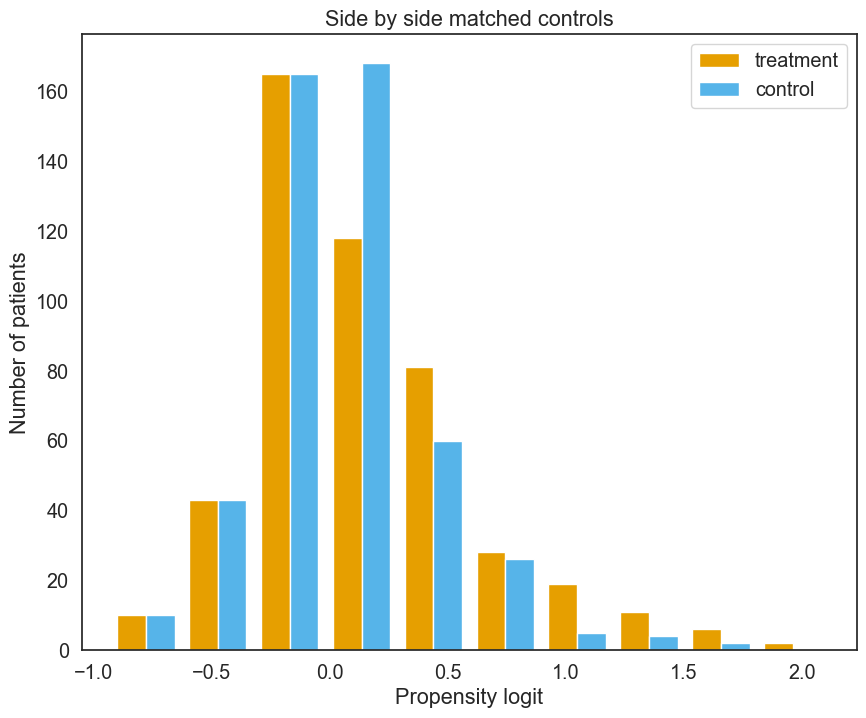

In [38]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

In [39]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [40]:
matched_df = psm.df_matched

In [41]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  e2f044e0-ba9f-48b7-b298-4219b75933ff  37.0    4                  0     5   
1  29bed67a-26d3-42c7-bbe1-32fe3bac1875  82.0    4                  0     3   
2  8845529b-3ed8-4fa4-9792-1034adc06e05  76.0    9                  0     3   
3  1c3f5262-b425-4923-a498-41f764fc8fed  70.0    2                  1     3   
4  1e33fb2f-2384-4744-99c9-dba3d7150952  73.0    7                  0     2   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.470465         -0.118279        1  
1                0          0          0.537826          0.151593        1  
2                1          0          0.625464          0.512806        1  
3                0          1          0.746260          1.078764        1  
4                1          0          0.586158          0.348104        1

In [42]:
matched_df.shape

(966, 10)

## Matched Ids

In [43]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  e2f044e0-ba9f-48b7-b298-4219b75933ff  fa9eb1f7-f1f2-4df3-92c7-a33b3afdfec5
1  29bed67a-26d3-42c7-bbe1-32fe3bac1875  c6447c5c-e6af-40e1-bf79-0e13d67380e2
2  8845529b-3ed8-4fa4-9792-1034adc06e05  b20791d3-36e1-49f0-8acf-26d94c068f70
3  1c3f5262-b425-4923-a498-41f764fc8fed  4a70f9a2-a055-4f78-b302-91572dce81c6
4  1e33fb2f-2384-4744-99c9-dba3d7150952  a9ede4a8-ad0c-4698-940a-14948a81a9cf

## Effect sizes per variables

In [44]:
psm.effect_size

Variable matching  Effect Size
0                 age   before     0.233499
1                 age    after    -0.025872
2                 CCI   before     0.269821
3                 CCI    after     0.028131
4   preop_hypotension   before     0.302939
5   preop_hypotension    after     0.220204
6                NEWS   before     0.110445
7                NEWS    after     0.093964
8     bl_hypertension   before     0.134890
9     bl_hypertension    after     0.024827
10          preop_MAP   before     0.223592
11          preop_MAP    after     0.166675

## Explore Matched df

In [45]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  e2f044e0-ba9f-48b7-b298-4219b75933ff  37.0    4                  0     5   
1  29bed67a-26d3-42c7-bbe1-32fe3bac1875  82.0    4                  0     3   
2  8845529b-3ed8-4fa4-9792-1034adc06e05  76.0    9                  0     3   
3  1c3f5262-b425-4923-a498-41f764fc8fed  70.0    2                  1     3   
4  1e33fb2f-2384-4744-99c9-dba3d7150952  73.0    7                  0     2   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.470465         -0.118279        1  
1                0          0          0.537826          0.151593        1  
2                1          0          0.625464          0.512806        1  
3                0          1          0.746260          1.078764        1  
4                1          0          0.586158          0.348104        1

In [46]:
matched_df.albumin.value_counts()

1    483
0    483
Name: albumin, dtype: int64

In [47]:
matched_df.shape

(966, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [48]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [49]:
f_df.shape

(966, 39)

In [50]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  e2f044e0-ba9f-48b7-b298-4219b75933ff  37.0    4                  0     5   
1  29bed67a-26d3-42c7-bbe1-32fe3bac1875  82.0    4                  0     3   
2  8845529b-3ed8-4fa4-9792-1034adc06e05  76.0    9                  0     3   
3  1c3f5262-b425-4923-a498-41f764fc8fed  70.0    2                  1     3   
4  1e33fb2f-2384-4744-99c9-dba3d7150952  73.0    7                  0     2   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                1          0          0.470465         -0.118279        1   
1                0          0          0.537826          0.151593        1   
2                1          0          0.625464          0.512806        1   
3                0          1          0.746260          1.078764        1   
4                1          0          0.586158          0.348104        1   

                               personid  pre_albumin  early_albumin  \
0  c11333e1-e0ae-4c72-a97d-5d85e08f6487            0              0   
1  feecdbe3-9a67-40fe-88d1-0b803c6c31b9            0              1   
2  0a78a02b-0e02-4740-a888-24a646f95d95            0              1   
3  1d8e6492-b9d3-4258-8ec6-f19ff030312a            1              0   
4  05caf1ec-fb35-472c-8011-d9e9fde6468b            0              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             1    0  66.178472                 0                 0.0   
1             1    0  15.306944                 0                 0.0   
2             1    0   9.553472                 0                 1.0   
3             0    0   5.288194                 0                 0.0   
4             1    0   7.372222                 0                 0.0   

   hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
0                  23            0   F  White                   0        0   
1                  75            1   M  White                   0        0   
2                  41            1   F  White                   1        0   
3                  85            0   F  White                   1        0   
4                  81            1   F  Black                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            3.3                          Low             2.9        NaN   
1            2.8                          Low             2.4       1.23   
2            NaN                          NaN             NaN        NaN   
3            NaN                          NaN             NaN        NaN   
4            NaN                          NaN             3.2        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown        0.5                   Normal            0   
1                   Normal        1.0                   Normal            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown        NaN                  Unknown            0   

   non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0           0.0  123.641769                Normal    0      14.2   
1           0.0   69.780919  Early Kidney Disease    0       9.5   
2           0.0   94.012565                Normal    1       NaN   
3           0.0   92.350612                Normal    1       9.6   
4           0.0         NaN                   NaN    0       NaN   

  preop_hb_classification  open_pr  
0                  >= 9.0        1  
1                  >= 9.0        1  
2                 Unknown        1  
3                  >= 9.0        1  
4                 Unknown        1

In [51]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [52]:
f_df.albumin.value_counts()

1    483
0    483
Name: albumin, dtype: int64

In [53]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    120.000000
mean      11.199446
std        7.779335
min        2.975000
25%        6.298958
50%        8.413889
75%       14.219271
max       57.034792
Name: LOS_days, dtype: float64

In [54]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    846.000000
mean      14.475071
std       14.445209
min        1.194525
25%        6.199479
50%        9.412766
75%       17.308273
max      165.639583
Name: LOS_days, dtype: float64

In [55]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [56]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    112
1      8
Name: 90_day_mortality, dtype: int64


In [57]:
mrate(m)

30 Day Mortality Rate (pct): 6.666666666666667


In [58]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    798
1     48
Name: 90_day_mortality, dtype: int64


In [59]:
mrate(m1)

30 Day Mortality Rate (pct): 5.673758865248227


In [60]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    65
1.0    47
Name: 90_day_readmission, dtype: int64


In [61]:
rrate(r)

30 Day Readmission Rate (pct): 41.964285714285715


In [62]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    489
1.0    309
Name: 90_day_readmission, dtype: int64


In [63]:
rrate(r1)

30 Day Readmission Rate (pct): 38.721804511278194


In [64]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [65]:
a_df['CCI'].describe()

count    483.000000
mean       3.672878
std        2.741382
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       12.000000
Name: CCI, dtype: float64

In [66]:
na_df['CCI'].describe()

count    483.000000
mean       3.596273
std        2.704796
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       14.000000
Name: CCI, dtype: float64

In [67]:
a_df['age'].describe()

count    483.000000
mean      63.906832
std       14.533607
min        0.000000
25%       57.000000
50%       66.000000
75%       74.000000
max       88.000000
Name: age, dtype: float64

In [68]:
na_df['age'].describe()

count    483.000000
mean      64.265010
std       13.118679
min        0.000000
25%       57.000000
50%       66.000000
75%       73.000000
max       89.000000
Name: age, dtype: float64

In [69]:
a_df['preop_hypotension'].value_counts()

0    429
1     54
Name: preop_hypotension, dtype: int64

In [70]:
na_df['preop_hypotension'].value_counts()

0    458
1     25
Name: preop_hypotension, dtype: int64

In [71]:
a_df['NEWS'].describe()

count    483.000000
mean       2.037267
std        1.994458
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: NEWS, dtype: float64

In [72]:
na_df['NEWS'].describe()

count    483.000000
mean       1.863354
std        1.695112
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: NEWS, dtype: float64

In [73]:
a_df['bl_hypertension'].value_counts()

0    244
1    239
Name: bl_hypertension, dtype: int64

In [74]:
na_df['bl_hypertension'].value_counts()

0    250
1    233
Name: bl_hypertension, dtype: int64

In [75]:
a_df['preop_MAP'].value_counts()

0    455
1     28
Name: preop_MAP, dtype: int64

In [76]:
na_df['preop_MAP'].value_counts()

0    471
1     12
Name: preop_MAP, dtype: int64

In [77]:
f_df = df

In [78]:
f_df.albumin.value_counts()

0    685
1    483
Name: albumin, dtype: int64

In [79]:
f_df.to_csv('urology_elective_proc_psm_221107.csv', index=False)